## Prueba DataScience - Whale & Jaguar

I - Clasificador de textos - Model Baseline

In [ ]:
import json
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving clasificador.json to clasificador.json


In [ ]:
uploaded

In [ ]:
file_name = "clasificador.json"
io.StringIO(uploaded[file_name].decode("utf-8"))

In [ ]:
p=json.loads(uploaded[file_name].decode("utf-8"))

In [ ]:
d1=p[list(p)[0]]
d2=p[list(p)[1]]

In [ ]:
df = pd.DataFrame(list(d1.items()),columns = ['serial','text'])
df2 = pd.DataFrame(list(d2.items()),columns = ['serial','edad'])

In [ ]:
df3=pd.concat([df, df2], axis=1)

In [ ]:
df4=df3.drop(['serial'], axis=1)
df4['cleaned_resume'] = ''
df4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,edad,cleaned_resume
0,@gusgomez1701 @YaKoDj @TropiBogota @Apple @Hua...,50-64,
1,"@jlmorales5 Sol Campbell, Per Mertesacker, Ver...",13-17,
2,LA DIGNIDAD COMIENZA POR RESPETAR LA VIDA Y NO...,18-24,
3,@munqueik roba3,18-24,
4,Necesito ayuda,18-24,
...,...,...,...
29995,@IrreverentesCol @SecPompeo ¿Como estará Ivan ...,35-49,
29996,@GloriaAlvarez85 @Unbrokensecuri1 @Marco0301 @...,13-17,
29997,Creo firmemente q si buena parte de la poblaci...,65-xx,
29998,@CristoBustos @DanielSamperO Supuestamente el ...,50-64,


In [ ]:
type(df4)

pandas.core.frame.DataFrame

# **NLP Clasificador de textos**

**Caso de prueba:**

Utilice el conjunto de datos que se encuentra en la ubicación data/clasificador/clasificador.json para crear un modelo baseline que, a partir de la columna text prediga la edad de la persona que escribió dicho texto. El modelo debe estar creado en Python, utilice el framework que mejor le parezca (tenga en cuentael tiempo ya que es un modelo baseline).


Para abordar este multiclasficiador se importan diversas librerias para el desarrollo del mismo.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Conteo por rol laboral

In [ ]:
print(df4['edad'].value_counts())

35-49    8517
18-24    6902
50-64    5007
25-34    4893
65-xx    2830
13-17    1851
Name: edad, dtype: int64


## **1- Limpieza de texto (remoción de caracteres especiales) para generar un buena precisión de clasificación en el algoritmo.**

In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df4['cleaned_resume'] = df4.text.apply(lambda x: cleanResume(x))

In [ ]:
df4.head()

,text,edad,cleaned_resume
0,@gusgomez1701 @YaKoDj @TropiBogota @Apple @Hua...,50-64,Cual modelo de huawei tiene don Gustavo
1,"@jlmorales5 Sol Campbell, Per Mertesacker, Ver...",13-17,Sol Campbell Per Mertesacker Vermaelen y chap...
2,LA DIGNIDAD COMIENZA POR RESPETAR LA VIDA Y NO...,18-24,LA DIGNIDAD COMIENZA POR RESPETAR LA VIDA Y NO...
3,@munqueik roba3,18-24,roba3
4,Necesito ayuda,18-24,Necesito ayuda


In [ ]:
resumeDataSet=df4.copy()

**NLTK** es un módulo de Python que contiene muchas
funciones diseñadas para su uso en el análisis
lingüístico de documentos y en el procesamiento de
lenguaje natural, al ser una base de datos en ingles se puede procesar directamente con stopwords en dicho lenguaje, luego que se recorre el corpus de todas las celdas de la columna cleaned_resume se calcula la frecuencia por puntuación de las palabras.

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['text'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[('de', 15529), ('que', 13069), ('la', 9898), ('el', 7791), ('en', 6506), ('n', 5580), ('es', 5432), ('los', 5045), ('se', 4842), ('lo', 3692), ('por', 3584), ('un', 3514), ('con', 3339), ('para', 3054), ('las', 2583), ('del', 2381), ('una', 2065), ('le', 1957), ('como', 1892), ('al', 1768), ('si', 1757), ('su', 1613), ('est', 1518), ('No', 1487), ('Y', 1479), ('q', 1406), ('pero', 1382), ('ser', 1229), ('mi', 1186), ('Que', 1094), ('son', 1090), ('te', 1081), ('ya', 1054), ('eso', 1026), ('El', 1014), ('todo', 1009), ('La', 993), ('este', 941), ('ni', 940), ('sus', 855), ('hay', 833), ('A', 824), ('esta', 794), ('pa', 784), ('tiene', 761), ('cuando', 745), ('ese', 713), ('os', 712), ('solo', 680), ('todos', 679)]


Teniendo en cuenta que los algoritmos de `Sci-kit learn` solo emplean valores numéricos, debemos convertir la variable Category a dicho tipo de valor con un LabelEncoder:

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['edad']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [ ]:
resumeDataSet.head()

,text,edad,cleaned_resume
0,@gusgomez1701 @YaKoDj @TropiBogota @Apple @Hua...,4,Cual modelo de huawei tiene don Gustavo
1,"@jlmorales5 Sol Campbell, Per Mertesacker, Ver...",0,Sol Campbell Per Mertesacker Vermaelen y chap...
2,LA DIGNIDAD COMIENZA POR RESPETAR LA VIDA Y NO...,1,LA DIGNIDAD COMIENZA POR RESPETAR LA VIDA Y NO...
3,@munqueik roba3,1,roba3
4,Necesito ayuda,1,Necesito ayuda


In [ ]:
resumeDataSet.edad.value_counts() #understanding decode LabelEncoder

3    8517
1    6902
4    5007
2    4893
5    2830
0    1851
Name: edad, dtype: int64

## **2- Generar la representación embebida de palabras (embedding words) convirtiendo a un espacio vectorial los caracteres de texto, palabras o frases.**


Nótese que la columna `cleaned_resume` contiene palabras. Debemos encontrar una forma de contar las palabras dentro del cada mensaje para poder entrenar un algoritmo en sklearn.

**Algoritmo "Bag of Words":**

Todo problema en el que se necesite procesar datos de texto se conoce con el término de "Bag of Words" o bolsa de palabras. La idea detrás de este problema es muy simple:

*Contar un fragmento de texto y contar la frecuencia de las palabras que aparecen*

En `sklearn` existe un contador de vectorización que opera de la siguiente forma:

- Separa la cadena en palabras y le asigna un ID entero a cada palabra.

- Cuenta cada una de las palabras. 

- Convierte todas las palabras en minúsculas para tratarlas de forma igual.

- Ignora los caractéres especiales.

- Contiene un parámetro `stop_words`, que corresponde a las palabras más usadas en el lenguaje (por defecto, inglés).

Veamos la implementación:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['edad'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(24000, 36216)
(6000, 36216)


## **3- Implementar un modelo de Machine Learning**

No se estima pertinente usar una arquitectura como CNN o RNN ya que al ser un problema de clasificación textual se puede abordar con modelos menos complejos y en consecuencia menor costo computacional.

Entrenemos ahora con distintos modelos adecuados para esta clase de problemas, con su respectiva validación cruzada y testeemos los mejores 3 modelos.

In [ ]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score,plot_confusion_matrix
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import seaborn as sns

## **3.1 Sin balanceo de datos**

   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.373375        0.005856                     SVC
1              0.343292        0.004306  RandomForestClassifier
2              0.358000        0.005349      LogisticRegression
3              0.342292        0.003124           XGBClassifier
4              0.341375        0.007304       Gradient Boosting
5              0.351917        0.003836    ExtraTreesClassifier
6              0.267500        0.007381  DecisionTreeClassifier
7              0.325708        0.003216      AdaBoostClassifier


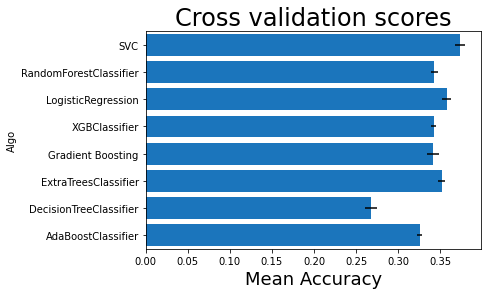

<Figure size 864x576 with 0 Axes>

In [ ]:
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=1234)


rs = 1234
clrs = []

clrs.append(SVC(random_state = rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(LogisticRegression(random_state=rs))
clrs.append(XGBClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
#clrs.append(MLPClassifier(random_state = rs))
clrs.append(ExtraTreesClassifier(random_state = rs))
clrs.append(DecisionTreeClassifier(random_state = rs))
clrs.append(AdaBoostClassifier(random_state=rs))


cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":['SVC',"RandomForestClassifier","LogisticRegression","XGBClassifier", "Gradient Boosting",'ExtraTreesClassifier','DecisionTreeClassifier',"AdaBoostClassifier"]})
g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std},color = '#0078d7')
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 24)
plt.figure(figsize = (12,8))
print(cv_df)

## **3.2 Balanceando los datos**

In [ ]:
from collections import Counter
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
def plot_frecuencia(X, y):
  unique, count = np.unique(y, return_counts=True)
  print(np.asarray((unique, count)).T)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
plot_frecuencia(X_res, y_res)

[[   0 6813]
 [   1 6813]
 [   2 6813]
 [   3 6813]
 [   4 6813]
 [   5 6813]]


   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.593451        0.007509                     SVC
1              0.591049        0.006863  RandomForestClassifier
2              0.494021        0.006013      LogisticRegression
3              0.321061        0.005090           XGBClassifier
4              0.341637        0.005157       Gradient Boosting
5              0.386783        0.004103          LGBMClassifier
6              0.630686        0.009373    ExtraTreesClassifier
7              0.418351        0.005876  DecisionTreeClassifier
8              0.280354        0.003110      AdaBoostClassifier


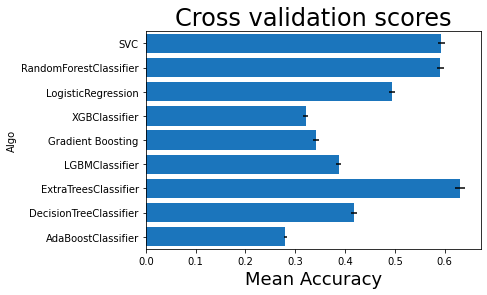

<Figure size 864x576 with 0 Axes>

In [ ]:
from lightgbm import LGBMClassifier
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=1234)


rs = 1234
clrs = []

clrs.append(SVC(random_state = rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(LogisticRegression(random_state=rs))
clrs.append(XGBClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(LGBMClassifier(random_state = rs))
clrs.append(ExtraTreesClassifier(random_state = rs))
clrs.append(DecisionTreeClassifier(random_state = rs))
clrs.append(AdaBoostClassifier(random_state=rs))


cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_res, y_res , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":['SVC',"RandomForestClassifier","LogisticRegression","XGBClassifier", "Gradient Boosting","LGBMClassifier", 'ExtraTreesClassifier','DecisionTreeClassifier',"AdaBoostClassifier"]})
g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std},color = '#0078d7')
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 24)
plt.figure(figsize = (12,8))
print(cv_df)

## **Resultados y Conlusiones**

- Se evidencia una clara y notoria mejoria en los resultados de rendimiento con respecto al desbalanceo de las muestras por clase, para ello una técnica de remuestreo como SMOTE permite que los algortimos usados tener una mejor abstracción o extracción de caracteristicas y en consecuencia mayor rendimiento de los clasificadores.

- La limpieza, recategprización de variables y preprocesamiento de texto con el uso de NLTK para el análisis lingüístico y posteriormente generación de representación embebida de palabras (embedding words) convirtiendo finalmente a un espacio vectorial los caracteres de texto, palabras o frases, prepara una matriz WordFeatures para hacer el split del conjunto de datos para train y para test. 

- Desarrollando un modelo de rápido entrenamiento (baseline) y baja complejidad en este caso un ExtraTreesClassifier se llega a tener un rendimiento del 63% utilizando una validación cruzada por k-fold, esto significa que el modelo es suceptible de mejoras con afinamiento adecuado de hiperparametros, mayor tiempo de entrenamiento, mayor número de epocas, entre otros.

